In [1]:
using Random, PyPlot, Statistics
using LinearAlgebra

const T = Float64 # just getting the picture
const p = T.((180//100,35//100))

include("../simulations/cool-intervals.jl")

cool_intervals (generic function with 1 method)

In [2]:
# start with the backward-invariant unstable manifold between w_0 and w_1
beta = (p[1]-sqrt(p[1]^2+4p[2]))/2; alpha = -beta/(1+beta)
x_ref_end = -alpha/beta; x_ref_start = 1-p[1]*x_ref_end
Q = [1 -beta; beta 1]/sqrt(1+beta*beta)
Is = Q[2,:]*alpha .+ sqrt(1+beta*beta)*T.([1,0])*[x_ref_start x_ref_end]

# spinup
for i = 1:10000
    Is, Q, c, cw = cool_intervals(Is,Q,p)
end

attractor_endpts = Array{Float64}(undef,2,2,4000)
for i = 1:4000
    Is, Q, c, cw = cool_intervals(Is,Q,p)
    attractor_endpts[:,:,i] = Float64.(mid.(Q*Is))
end

In [3]:
n = 2; k = 1
attractor_endpts[:,k,n+1], smap!(deepcopy(attractor_endpts[:,k,n]),p)

([0.8454098775800059, 0.0], [-0.14897954734056418, -0.17600849872455904])

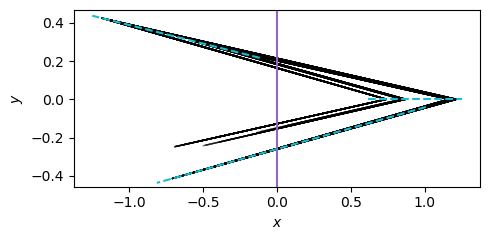

In [32]:
lines = [Float64.(mid.(attractor_endpts[:,:,i]')) for i = 1:500]
lwl = [1 ./norm(l[1,:] - l[2,:]) for l in lines]; lwl /= 3mean(lwl); lwl = min.(lwl,1)
figure(figsize=(5,2.5))

# w0 = [2/(2+p[1]-sqrt(p[1]^2+4p[2])),0.]; w1 = smap!(copy(w0),p); w2 = smap!(copy(w1),p)
# gca().add_patch(matplotlib.patches.Polygon([w0 w1 w2]',zorder=0,alpha=0.3,fc="C2",ec="C2"))

attractor = matplotlib.collections.LineCollection(lines,
        linewidth=1.0,colors=[zeros(length(lines),3) lwl],zorder=1,label="Attractor \$\\Lambda\$")
gca().add_collection(attractor)
plot([0],[0],c=[0,0,0,0]); yl = ylim() # plotting something quite dummy just to get the attractor's ylim
plot([0,0],[-10,10],"C4",label="\$\\mathcal{S}\$",zorder=1); ylim(yl)

pts = [[0.,y] for y = -0.38:0.001:0.25]
pts = smap!.(pts,[p])
plot([x[1] for x in pts],[x[2] for x in pts],"C9--")
pts = smap!.(pts,[p])
plot([x[1] for x in pts],[x[2] for x in pts],"C9--")
pts = smap!.(pts,[p])
plot([x[1] for x in pts],[x[2] for x in pts],"C9--")

#xlim((xlim()[2]-xlim()[1])/2*[-1,1])

# ccone = (p[1] - sqrt(p[1]^2 - 4p[2]))/2+0.1
# for (leg,px,py) = [(true,xlim()[1]/2,0),(false,xlim()[2]/2,0)]
#     xdisp = (-0.4:0.05:0.4)
#     fill_between(px .+ xdisp, py .- xdisp*ccone,py .+ xdisp*ccone,color="C3",alpha=0.5,linewidth=0)
#     plot(px .+ xdisp, py .- xdisp*ccone,color="C3")
#     plot(px .+ xdisp, py .+ xdisp*ccone,color="C3")

#     ang = Jmap(px>0,p)\[ccone ccone;-1 1]
#     relang = ang[1,:]./ang[2,:]
#     fill_betweenx(py .+ xdisp, px .+ xdisp * relang[1], px .+ xdisp * relang[2],color="C9",alpha=0.5,linewidth=0)
#     plot(px .+ xdisp * relang[1], py .+ xdisp ,color="C9")
#     plot(px .+ xdisp * relang[2], py .+ xdisp,color="C9")
# end


# gca().set_aspect("equal")
xlabel("\$x\$"); ylabel("\$y\$")
# xticks([]); yticks([])
tight_layout()
savefig("../figures/LoziAttractor.pdf")

In [32]:
2/9*1.3^2

0.3755555555555556